# Segmentación de Especies con Cluster Analysis

El conjunto de datos de la flor **Iris** es uno de los más populares para el Aprendizaje de Máquina (ML).  Si no lo conocen, pueden leer sobre él en:

https://en.wikipedia.org/wiki/Iris_flower_data_set

El conjunto de datos *iris.csv* tiene cuatro variables:  

* **sepal length** (longitud del sépalo), 
* **sepal width** (ancho del sépalo), 
* **petal length** (longitud del pétalo), 
* **petal width** (ancho del pétalo).

**SECCIÓN 1:**

1. Visualicen los datos para ver si pueden detectar algunos grupos. **Ayuda:**   utilicen la forma del sépalo:

2. Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados.  

3. Estandaricen los datos e intenten el paso 2, de nuevo.  ¿Qué diferencias hay, si es que lo hay?

4. Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un rango de 1 a 10)

5. Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos 3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.

6. Comparen sus soluciones con los datos reales, archivo: *iris-con-respuestas.csv*

**Obviamente solo hay tres especies, porque ese es el archivo de datos reales!**

¿Funcionó el clustering con la forma del sépalo?

**Sección 2:**

Repitan el proceso pero ahora utilizando la forma del pétalo.  Respondan a las mismas preguntas


**Sección 3:**

Utilicen la librería "kneed" y vean si el resultado coincide con el método del "codo" que hicieron manualmente.  ¿A que podría deberse la diferencia, si la hay?  ¿Les dió el número correcto de clusters, comparado a los datos reales?  

Basado en los resultado que tuvieron, ¿A qué conclusiones llegaron?


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [68]:
datos = pd.read_csv('iris.csv')
datos

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [69]:

data_sepalo = datos.iloc[:, 0:2]
data_sepalo

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


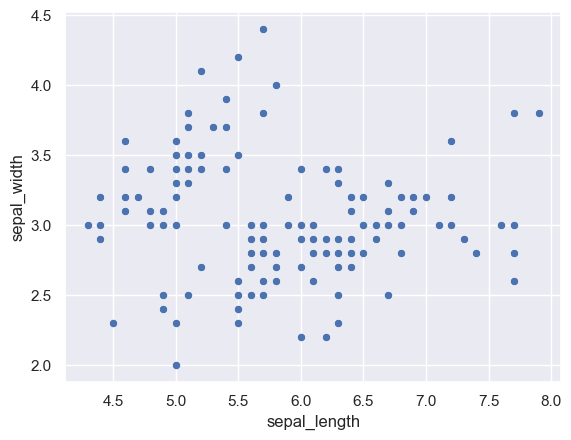

In [70]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=data_sepalo)
plt.show()

In [71]:
from sklearn.cluster import KMeans
X = datos[['sepal_length','sepal_width']]
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
X['cluster'] = kmeans.labels_
X

c:\Users\Cristian Aguirre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Cristian Aguirre\AppData\Local\Temp\ipykernel_2232\587973601.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.labels_


,sepal_length,sepal_width,cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,1
147,6.5,3.0,1
148,6.2,3.4,1


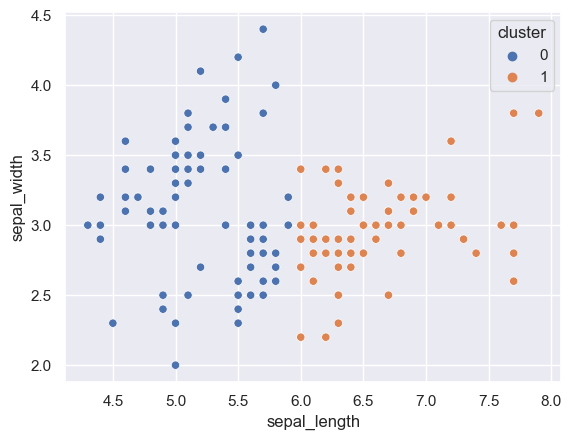

In [72]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='cluster', data=X)
plt.show()

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = datos[['sepal_length','sepal_width']]
X_scaled = scaler.fit_transform(X_scaled)
X_scaled = pd.DataFrame(X_scaled, columns=['sepal_length','sepal_width'])


c:\Users\Cristian Aguirre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


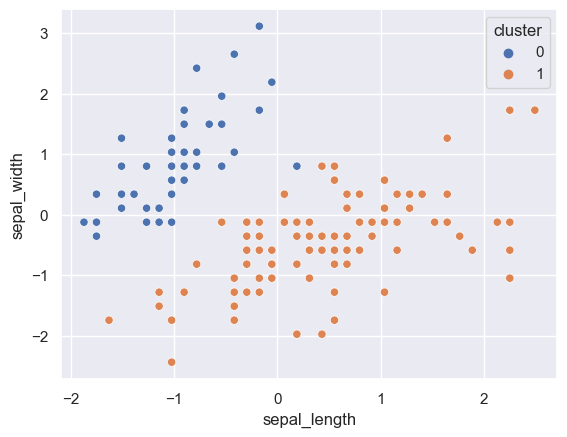

In [74]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)

X_scaled['cluster'] = kmeans.labels_
sns.scatterplot(x='sepal_length', y='sepal_width', hue='cluster', data=X_scaled)
plt.show()

c:\Users\Cristian Aguirre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Cristian Aguirre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Cristian Aguirre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Cristian Aguirre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will cha

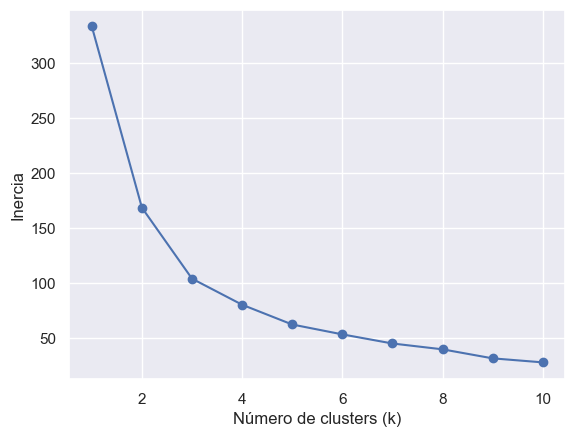

In [75]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
plt.plot(range(1, 11), inertias, '-o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.show()


**3 klusters**

c:\Users\Cristian Aguirre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


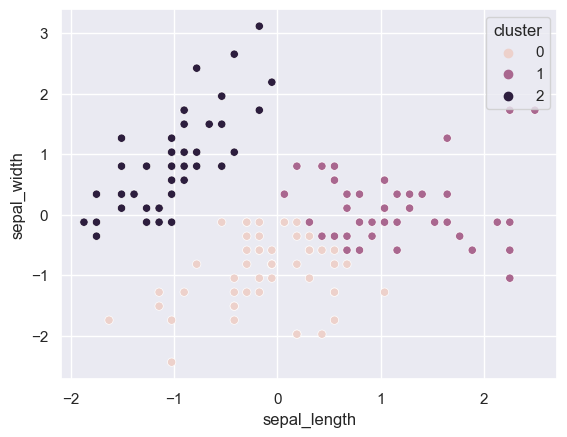

In [76]:
scaler = StandardScaler()
X_scaled = datos[['sepal_length','sepal_width']]
X_scaled = scaler.fit_transform(X_scaled)
X_scaled = pd.DataFrame(X_scaled, columns=['sepal_length','sepal_width'])

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)

X_scaled['cluster'] = kmeans.labels_
sns.scatterplot(x='sepal_length', y='sepal_width', hue='cluster', data=X_scaled)
plt.show()

**3 klusters**

c:\Users\Cristian Aguirre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


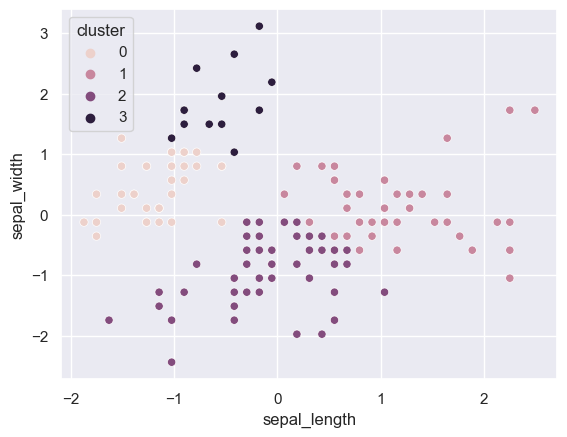

In [77]:
scaler = StandardScaler()
X_scaled = datos[['sepal_length','sepal_width']]
X_scaled = scaler.fit_transform(X_scaled)
X_scaled = pd.DataFrame(X_scaled, columns=['sepal_length','sepal_width'])

kmeans = KMeans(n_clusters=4)
kmeans.fit(X_scaled)

X_scaled['cluster'] = kmeans.labels_
sns.scatterplot(x='sepal_length', y='sepal_width', hue='cluster', data=X_scaled)
plt.show()

**3 klusters**

c:\Users\Cristian Aguirre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


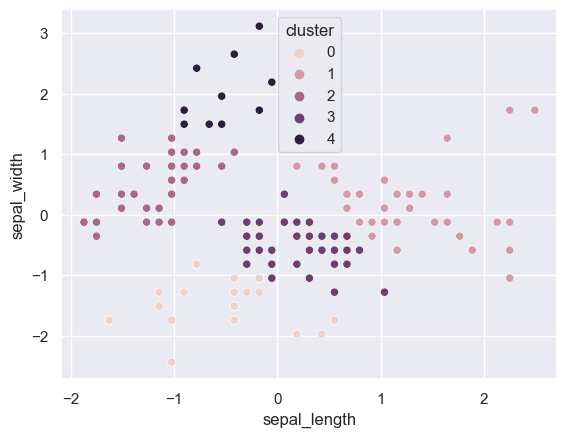

In [78]:
scaler = StandardScaler()
X_scaled = datos[['sepal_length','sepal_width']]
X_scaled = scaler.fit_transform(X_scaled)
X_scaled = pd.DataFrame(X_scaled, columns=['sepal_length','sepal_width'])

kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)

X_scaled['cluster'] = kmeans.labels_
sns.scatterplot(x='sepal_length', y='sepal_width', hue='cluster', data=X_scaled)
plt.show()

**3 klusters**

c:\Users\Cristian Aguirre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


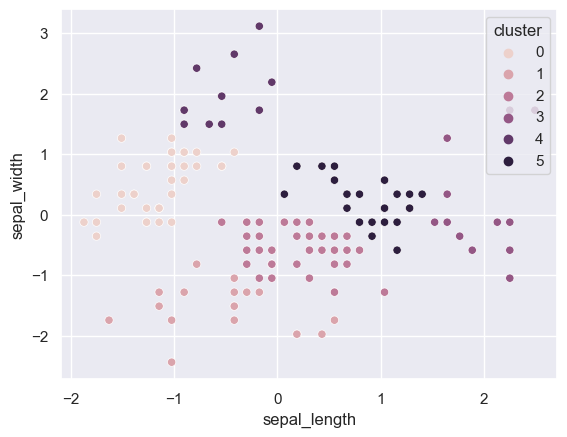

In [79]:
scaler = StandardScaler()
X_scaled = datos[['sepal_length','sepal_width']]
X_scaled = scaler.fit_transform(X_scaled)
X_scaled = pd.DataFrame(X_scaled, columns=['sepal_length','sepal_width'])

kmeans = KMeans(n_clusters=6)
kmeans.fit(X_scaled)

X_scaled['cluster'] = kmeans.labels_
sns.scatterplot(x='sepal_length', y='sepal_width', hue='cluster', data=X_scaled)
plt.show()

**3 klusters**

c:\Users\Cristian Aguirre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


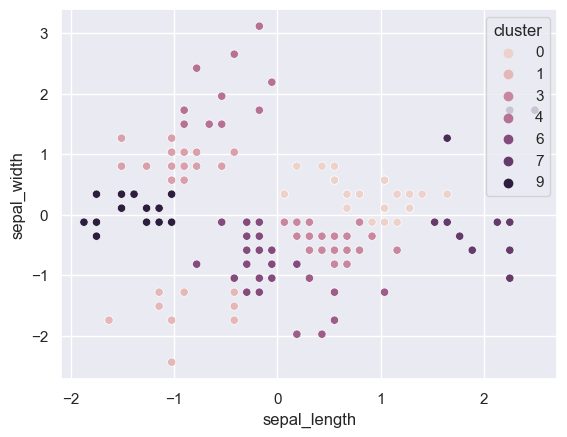

In [80]:
scaler = StandardScaler()
X_scaled = datos[['sepal_length','sepal_width']]
X_scaled = scaler.fit_transform(X_scaled)
X_scaled = pd.DataFrame(X_scaled, columns=['sepal_length','sepal_width'])

kmeans = KMeans(n_clusters=10)
kmeans.fit(X_scaled)

X_scaled['cluster'] = kmeans.labels_
sns.scatterplot(x='sepal_length', y='sepal_width', hue='cluster', data=X_scaled)
plt.show()

In [81]:
# data_petalo = datos.iloc[:, -2:]
# data_petalo

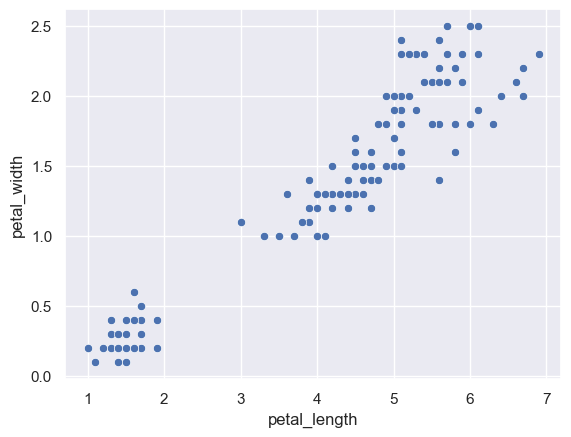

In [82]:
sns.scatterplot(x='petal_length', y='petal_width', data=data_petalo)
plt.show()